In [25]:
# keep things reproducable by setting the random seed.
import random
random.seed(31415)

# Fun Name for the Tool

In [26]:
import tools
#help(tools)

## Example: Reading Data

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


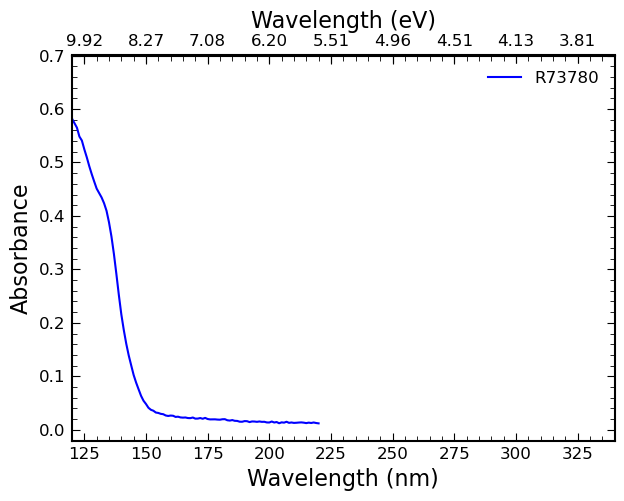

In [27]:
path = "./raw_data/SergioIoppolo-November2023/20231101/"

bkgd_short1 = path + "R73773.d01"
bkgd_short2 = path + "R73773.d02"
sample_short1 = path + "R73780.d01"
sample_short2 = path + "R73780.d02"

# build short spectrum
spec1 = tools.Spectrum()
spec1.change_name("R73780")
spec1.add_bkgd(bkgd_short1)
spec1.add_bkgd(bkgd_short2)
spec1.add_sample(sample_short1)
spec1.add_sample(sample_short2)
spec1.change_color("blue")
spec1.average_scans()

tools.plot_absorbance([spec1], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/one_spectrum.svg");

## Example: Plotting Data

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


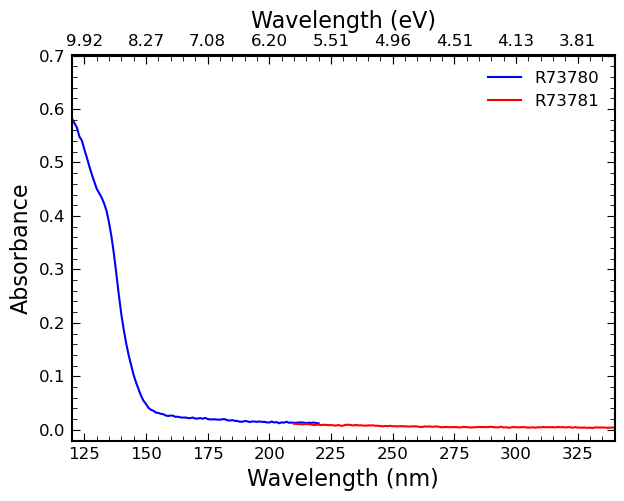

In [28]:
bkgd_long1 = path + "R73775.d01"
bkgd_long2 = path + "R73775.d02"
sample_long1 = path + "R73781.d01"
sample_long2 = path + "R73781.d02"

# build long spectrum
spec2 = tools.Spectrum()
spec2.change_name("R73781")
spec2.add_bkgd(bkgd_long1)
spec2.add_bkgd(bkgd_long2)
spec2.add_sample(sample_long1)
spec2.add_sample(sample_long2)
spec2.change_color("red")
spec2.average_scans()

tools.plot_absorbance([spec1, spec2], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/two_spectrums.svg");

## Example: Shifting Spectrums

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


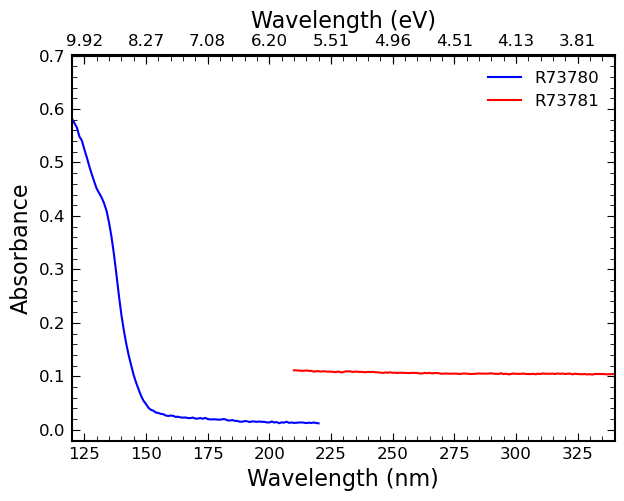

In [29]:
spec2.change_offset(0.1)

tools.plot_absorbance([spec1, spec2], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/shift_example.svg");

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


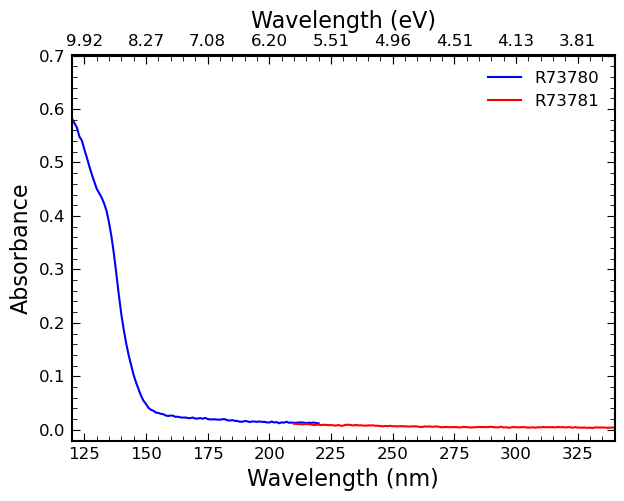

In [32]:
spec2.change_offset(0.0)

tools.plot_absorbance([spec1, spec2], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/shift_example_2.svg");

## Example: Stitching Spectra

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


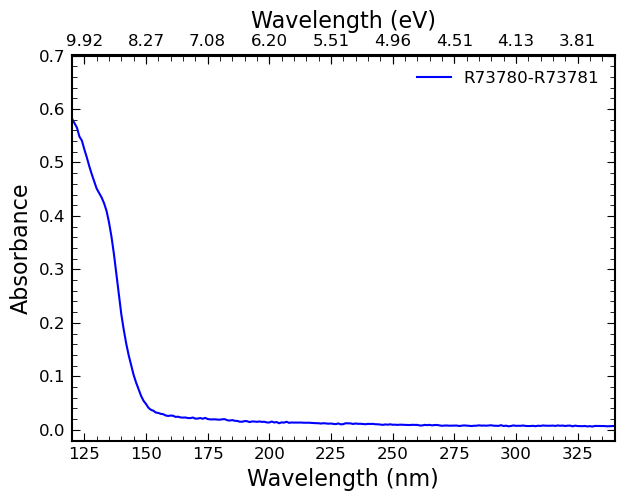

In [31]:
stitched = tools.StitchedSpectrum(spec1, spec2)

tools.plot_absorbance([stitched], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/stitched.svg");

## Example: Changing Names

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


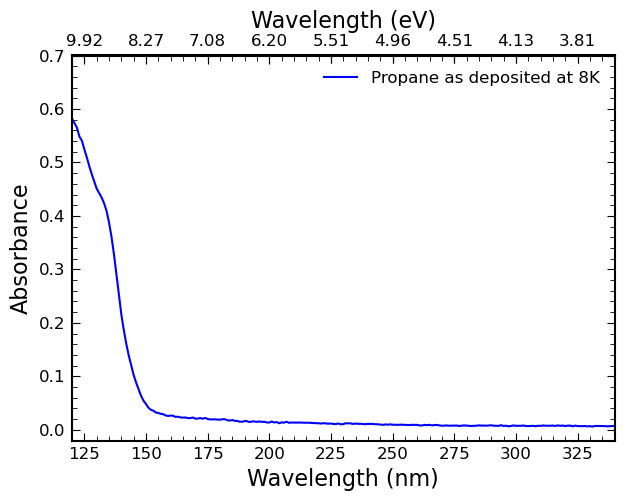

In [33]:
stitched.change_name("Propane as deposited at 8K")

tools.plot_absorbance([stitched], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/name_change.svg");

## Example: Changing Colors

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


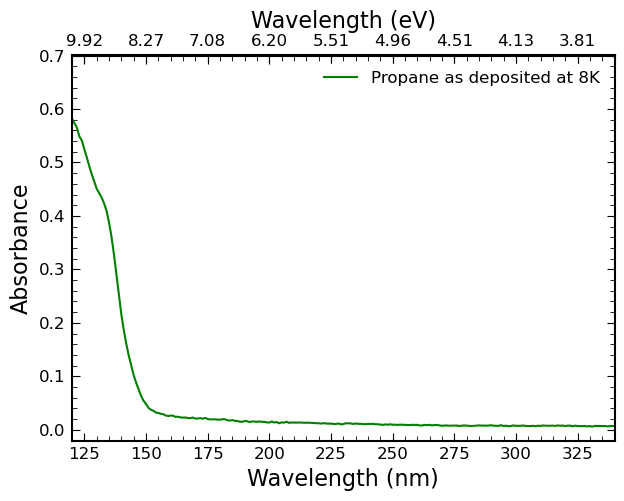

In [34]:
stitched.change_color("green")

tools.plot_absorbance([stitched], figsize=(7, 5),
                      xlim=(120, 340), ylim=(-0.02, 0.7),
                      save_path="./misc_figures/color_change.svg");

## Example: Fitting with gaussians

In [1]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# keep things reproducable
random.seed(31415)
# define colors for plotting
colors = ["#dcdcdc", "#2f4f4f", "#a52a2a", "#191970", "#006400", "#bdb76b", "#9acd32",
"#66cdaa", "#ff0000", "#ff8c00", "#ffd700", "#c71585", "#0000cd", "#00ff00",
"#00fa9a", "#00bfff", "#ff00ff", "#dda0dd", "#7b68ee", "#ffa07a"]

def build_spectra(path, bkgd_short1, bkgd_short2, bkgd_long1, bkgd_long2,
                  sample_short1, sample_short2, sample_long1, sample_long2,
                  color="#000001", name=None):
    """
    Builds the spectra as appropriate for this experiment
    """
    # build short spectrum
    spec1 = tools.Spectrum()
    spec1.change_name(sample_short1[-9:-4])
    spec1.add_bkgd(bkgd_short1)
    spec1.add_bkgd(bkgd_short2)
    spec1.add_sample(sample_short1)
    spec1.add_sample(sample_short2)
    spec1.change_color(color)
    spec1.change_offset(0.0)
    spec1.average_scans()

    # build long spectrum
    spec2 = tools.Spectrum()
    spec2.change_name(sample_long1[-9:-4])
    spec2.add_bkgd(bkgd_long1)
    spec2.add_bkgd(bkgd_long2)
    spec2.add_sample(sample_long1)
    spec2.add_sample(sample_long2)
    spec2.change_color(color)
    spec2.change_offset(0.0)
    spec2.average_scans()

    stiched = tools.StitchedSpectrum(spec1, spec2)
    if name:
        stiched.change_name(name)
    return stiched

path = "./raw_data/SergioIoppolo-November2023/20231101/"
#save_path = "./calibrated_data/SergioIoppolo-November2023/propane/"

bkgd_short1 = path + "R73773.d01"
bkgd_short2 = path + "R73773.d02"
bkgd_long1 = path + "R73775.d01"
bkgd_long2 = path + "R73775.d02"

sample_short1 = path + "R73808.d01"
sample_short2 = path + "R73808.d02"
sample_long1 = path + "R73809.d01"
sample_long2 = path + "R73809.d02"

spec = build_spectra(path, bkgd_short1, bkgd_short2, bkgd_long1, bkgd_long2,
                        sample_short1, sample_short2, sample_long1, sample_long2,
                        color=colors[11], name="200K Propane + 50s 1keV e-")


# fix the end of the spectrum to 0
i = len(spec.data['absorbance'])
spec.change_offset(-1*spec.data['absorbance'][i-1])
    
# define the lower limit for fitting
fit_lim_low=130

Attempting fit with 1 gaussians
success! reduced chi2: 416.50
Attempting fit with 2 gaussians
success! reduced chi2: 1.81
Attempting fit with 3 gaussians
success! reduced chi2: 1.26
Attempting fit with 4 gaussians
success! reduced chi2: 1.05
Attempting fit with 5 gaussians
success! reduced chi2: 0.84
Attempting fit with 6 gaussians
success! reduced chi2: 0.75
The best fit was achieved with 4 gaussians and a reduced chi2 of 1.05


/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


(<Axes: ylabel='Absorbance'>, <Axes: xlabel='Wavelength (nm)'>)

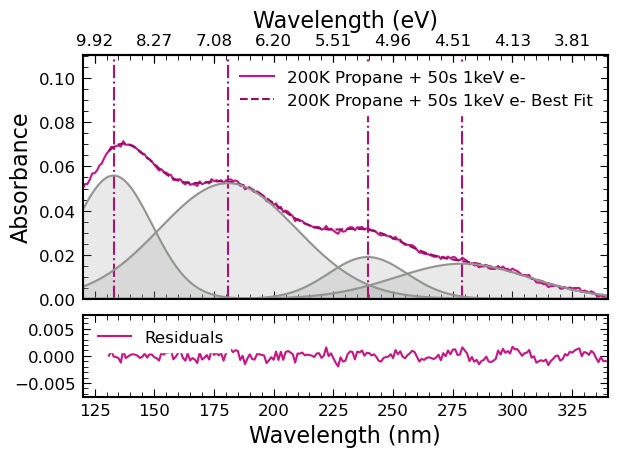

In [3]:
guesses = [{'lower':0, 'guess':4, 'upper':5},   # amplitude
           {'lower':0, 'guess':135, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':3, 'upper':5},   # amplitude
           {'lower':0, 'guess':185, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':2, 'upper':5},   # amplitude
           {'lower':225, 'guess':240, 'upper':250},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':274, 'guess':276, 'upper':279},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':296, 'guess':298, 'upper':300},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.1, 'upper':5},   # amplitude
           {'lower':324, 'guess':326, 'upper':328},   # center
           {'lower':0, 'guess':10, 'upper':100},   # standard deviation
          ]

spec.fit_peaks(verbose=True, ng_lower=1, ng_upper=7, guesses=guesses, fit_lim_low=fit_lim_low)
tools.plot_fit(spec, plot_peaks=True, xlim=(120, 340),
               ylim=(0, spec.data[spec.data['wavelength']>120]['absorbance'].max()*1.1),
               plot_fit_components=True, save_path="./misc_figures/fit.svg")

Attempting fit with 6 gaussians
success! reduced chi2: 0.75
The best fit was achieved with 6 gaussians and a reduced chi2 of 0.75


/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


(<Axes: ylabel='Absorbance'>, <Axes: xlabel='Wavelength (nm)'>)

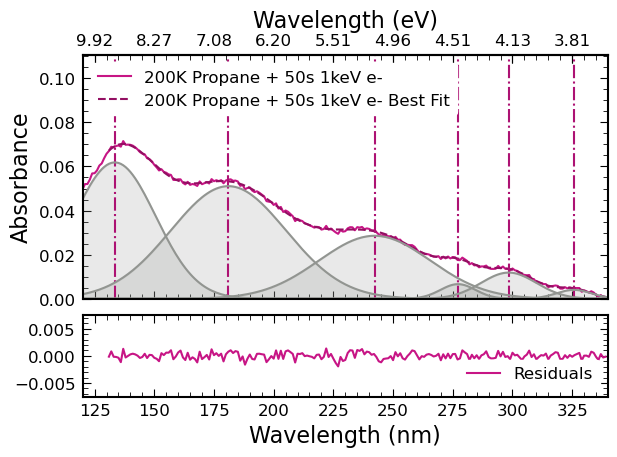

In [4]:
guesses = [{'lower':0, 'guess':4, 'upper':5},   # amplitude
           {'lower':0, 'guess':135, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':3, 'upper':5},   # amplitude
           {'lower':0, 'guess':185, 'upper':340},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':2, 'upper':5},   # amplitude
           {'lower':225, 'guess':240, 'upper':250},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':274, 'guess':276, 'upper':279},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':296, 'guess':298, 'upper':300},   # center
           {'lower':0, 'guess':20, 'upper':100},   # standard deviation
           
           {'lower':0, 'guess':0.1, 'upper':5},   # amplitude
           {'lower':324, 'guess':326, 'upper':328},   # center
           {'lower':0, 'guess':10, 'upper':100},   # standard deviation
          ]

spec.fit_peaks(verbose=True, ng_lower=6, ng_upper=7, guesses=guesses, fit_lim_low=fit_lim_low)
tools.plot_fit(spec, plot_peaks=True, xlim=(120, 340),
               ylim=(0, spec.data[spec.data['wavelength']>120]['absorbance'].max()*1.1),
               plot_fit_components=True, save_path="./misc_figures/fit_forced.svg")